In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

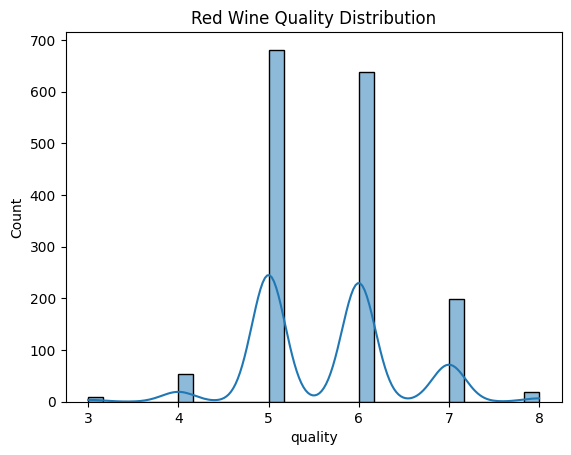

In [5]:
sns.histplot(data=df, x="quality", kde=True)
plt.title("Red Wine Quality Distribution")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Assuming 'quality' is the target variable
X_red = df.drop("quality", axis=1)
y_red = df["quality"]
# Split the data into training and testing sets
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model_red =RandomForestClassifier(criterion='entropy')
model_red.fit(X_red_train, y_red_train)


RandomForestClassifier(criterion='entropy')

In [7]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the red wine model
y_red_pred = model_red.predict(X_red_test)
print("Red Wine Classification Report:")
print(classification_report(y_red_test, y_red_pred))
print("Accuracy:", accuracy_score(y_red_test, y_red_pred))




Red Wine Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.70      0.78      0.74       130
           6       0.64      0.70      0.67       132
           7       0.62      0.43      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.63      0.66      0.64       320

Accuracy: 0.6625


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
random_observation = pd.DataFrame(data={
    "fixed acidity": [7.2],
    "volatile acidity": [0.75],
    "citric acid": [0.00],
    "residual sugar": [7],
    "chlorides": [0.071],
    "free sulfur dioxide": [11.5],
    "total sulfur dioxide": [34.6],
    "density": [1],
    "pH": [3.57],
    "sulphates": [0.66],
    "alcohol": [9.58],
})

# Predict wine quality for the random observation using the red wine model
red_wine_quality = model_red.predict(random_observation)[0]


print("Predicted Red Wine Quality:", red_wine_quality)


Predicted Red Wine Quality: 5
